# Machine learning : Classification notebook

-----------------------------

In this notebook, we will go over all the following implementations  
  
I. Classification algorithms  
1. Perceptron algorithm 
2. Adalin algorithm
3. Pocket algorithm  
  

---------------------------------------

Before we start, we will make sure we can import our models from external sources

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

# Classification algorithms

## 1. Perceptron algorithm

### Model of Perceptron

We will present first the libraries used then the class that contains the model.

In [2]:
# Libraries used in this algorithm 
import numpy as np
import matplotlib.pyplot as plt

### Testing of Perceptron

We prepare our data first, we will use here sklearn to generate a data and we will plot it

In [3]:
# Additional libraries
from sklearn.model_selection import train_test_split
from sklearn import datasets

Data

In [4]:
# create a non linear data
X,y = datasets.make_moons(150, noise=0.1, random_state=0)

Visualisation of the data

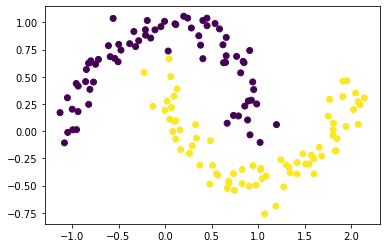

In [5]:
# visulize it (close the first window of the visualization so start training the model)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Test of the model

In [21]:
# We import the model
from src.modules.perceptron import Perceptron

# We add to the X a row of ones because we are using a vectorized form of the weight and bias
X_hstacked = np.hstack((X,np.ones((len(X),1))))

# split the data to train and test set
X_train, X_test, Y_train ,Y_test = train_test_split(X_hstacked,y , test_size=0.2,shuffle=True)

# initiate the model
model = Perceptron()

# train the model
model.fit(X_train,Y_train)

# predict
y_pred = model.predict(X_test)

# calculate the accuracy
print("Accuracy: ",model.accuracy(y_pred,Y_test))

# plot the emperical error
model.draw_loss()



KeyboardInterrupt: 

### Model of Perceptron

We will present first the libraries used then the class that contains the model.

In [ ]:
# Libraries used in this algorithm 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Class of the model

class Pocket:
    def __init__(self,w0,T_max=100) :
        self.w0 = np.array(w0)
        self.T_max = T_max
        self.activation_function = self.activation_func
        self.weights_t = None # for the PLA update
        self.weight_s    = None # for the pocket update
        self.weights = None
        self.loss = []
    
    def sign(self,W,X):
        '''
        x : an array of one sample
        w : weights
        '''

        return np.sign(np.vdot(W,X))

    # Activation function
    def activation_func(self,Y):
        '''
        y : the predections 
        '''
        return np.where(Y>0,1,-1)
    
    # Unit function: returns 1 if a is different than b or 0 otherwise
    def unit_func(self,a,b):
        return 1 if a!=b else 0

    def emperical_error(self,X,Y,W):
        '''
        X : array of all simples (rows are the simples, columns are the features)
        y : array of the predictions
        return the emperical error.
        '''
        n = len(X)
        sum = 0
        for i,x_i in enumerate(X) :
            sum += self.unit_func(self.activation_func(np.vdot(W,x_i)),Y[i])
        return sum/n
    def fit(self,X,Y):
        
        Y = self.activation_func(Y)
        n_simples,_ = X.shape
        self.weight_s = self.w0
        self.weights_t = self.w0
        for t in range(self.T_max):
            # calculate w(t) using PLA
            for i in range(n_simples):
                if self.sign(self.weights_t,X[i])*Y[i] < 0:
                    self.weights_t += Y[i]*X[i]
            # Evaluate Ls(w(t))
            Ls_wt = self.emperical_error(X,Y,self.weights_t)
            Ls_ws = self.emperical_error(X,Y,self.weight_s)
            self.loss.append([t,Ls_ws])
            if Ls_wt < Ls_ws :
                self.weight_s = self.weights_t
        self.weights = self.weight_s
        return self.weights
    def predict(self,X):
        '''
        X: array of test set of samples
        '''
        output = np.array([np.vdot(x,self.weights) for x in X])
        return self.activation_func(output)
    def accuracy(self,Y_predicted,Y_test):
        Y_predicted = self.activation_func(Y_predicted)
        Y_test      = self.activation_func(Y_test)
        acc = 0
        for i in range(len(Y_predicted)):
            if Y_predicted[i] == Y_test[i]:
                acc += 1
        return acc/len(Y_test)
    def draw_loss(self):
        x = np.array(self.loss)[:,0]
        y = np.array(self.loss)[:,1]
        plt.ylabel("Emperical Error")
        plt.xlabel("Iterations")
        plt.plot(x,y)
        plt.show()


        
class Percepton:
    def __init__(self,eps=0.1) :
        self.eps = eps
        self.activation_function = self.activation_func
        self.weights = None
        self.loss = []
    
    def sign(self,W,X):
        
        # X : Array of simple i
        # W : Weights
        
        return np.sign(np.vdot(W,X))


    
    def activation_func(self,Y):
        
        #Y : Predictions 
        
        return np.where(Y>0,1,-1)
    

    # Unit function: returns 1 if a is different than b or 0 otherwise
    def unit_func(self,a,b):
        return 1 if a!=b else 0

    # Function that computes the empirical error of the model
    def emperical_error(self,X,Y):
        
        # X : array of all simples where the rows are the simples
        # Y : array of predictions
        n = len(X)
        sum = 0
        for i,x_i in enumerate(X) :
            sum += self.unit_func(self.activation_func(np.vdot(self.weights,x_i)),Y[i])
        return sum/n

    # Fit function with which we train our model
    def fit(self,X,Y):

        y = self.activation_func(Y)
        n_simples,n_features = X.shape
        self.weights = np.random.rand(n_features)
        
        Ls = self.emperical_error(X,Y)
        t = 0
        while (Ls > self.eps) :
            for i in range(n_simples):
                if self.sign(self.weights,X[i])*Y[i] < 0:

                    self.weights += Y[i]*X[i]
                    t += 1
                    Ls = self.emperical_error(X,Y)
                    self.loss.append([t,Ls])
        return self.weights

    # Predction function: it predict a value of an input through the model and not the y of the data
    def predict(self,X):
        # X: array of test set of samples
        output = np.array([np.vdot(x,self.weights) for x in X])
        return self.activation_func(output)

    # Accuracy function: it returns the accuracy of the prediction in our model
    def accuracy(self,Y_predicted,Y_test):
        Y_predicted_ = self.activation_func(Y_predicted)
        Y_test_      = self.activation_func(Y_test)
        acc = 0
        for i in range(len(Y_predicted_)):
            if Y_predicted_[i] == Y_test_[i]:
                acc += 1
        return acc/len(Y_test_)

    # Loss drawing function: it gives the shape of the loss function through the list self.loss
    def draw_loss(self):
        X = np.array(self.loss)[:,0]
        Y = np.array(self.loss)[:,1]
        plt.ylabel("Emperical Error")
        plt.xlabel("Iterations")
        plt.plot(X,Y)
        plt.show()


### Testing of Perceptron

We prepare our data first, we will use here sklearn to generate a data and we will plot it

In [ ]:
# Additional libraries
from sklearn.model_selection import train_test_split
from sklearn import datasets

Data

In [ ]:
# create a non linear data
X,y = datasets.make_moons(150, noise=0.1, random_state=0)

Visualisation of the data

In [ ]:
# visulize it (close the first window of the visualization so start training the model)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Test of the model

In [ ]:
# We import the model
from Perceptron import Perceptron

# We add to the X a row of ones because we are using a vectorized form of the weight and bias
X_hstacked = np.hstack((X,np.ones((len(X),1))))

# split the data to train and test set
X_train, X_test, Y_train ,Y_test = train_test_split(X_hstacked,y , test_size=0.2,shuffle=True)

# initiate the model
model = Perceptron()

# train the model
model.fit(X_train,Y_train)

# predict
y_pred = model.predict(X_test)

# calculate the accuracy
print("Accuracy: ",model.accuracy(y_pred,Y_test))

# plot the emperical error
model.draw_loss()

